---

# `Instruções para o teste`

## ⚠️ Importante

Antes de iniciar, não esqueça de renomear esse documento substituindo o texto **SEU_NOME** no título com o nome de quem for resolver.

Deixe as respostas bem sinalizadas e comentadas e mencionando a qual questão se refere.

Fique à vontade para utilizar quantas células forem necessárias.

<br><br>

## 📖 Recursos Permitidos
✅ Documentação, sites, fóruns  
❌ Inteligências Artificiais (ChatGPT, Claude, etc.)

<br><br>

## 📤 Instruções para Entrega

**Ao finalizar o teste** volte a este passo e execute a célula abaixo.

**Envie o arquivo gerado e o arquivo do seu notebook para o e-mail:** `mateus.camacho@tdwbi.com.br`

- Arquivo gerado: `historico_exec.txt` <br>
- Seu notebook: `teste_spark_SEU_NOME.ipynb`


In [35]:
with open('/content/historico_exec.txt', 'w') as f:
    for i, cmd in enumerate(In):
        if cmd.strip():
            f.write(f"\n\nIn[{i}]:\n{cmd}\n\n")

# Baixar arquivo
from google.colab import files
files.download('/content/historico_exec.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# `Questões e Contexto`

## 📁 Contexto

No diretório raiz desse documento, existem os três arquivos que serão necessários para a conclusão dessa atividade. Em caso de dúvidas, a pasta de se encontra no desktop dessa máquina na pasta 'pyspark_test'.

Os dados são fictícios e compreendem uma simulação de um cenário de uma loja de departamentos, para isso temos os arquivos com as seguintes informações:
- **users.csv** → Dados dos clientes/usuários da loja
- **sales.csv** → Dados das vendas
- **products.json** → Dados de cadastro dos produtos

<br><br>

## 📝 Questões

A atividade consiste nas questões a seguir:

**1.** Declare um novo dataframe que mostre o nome do produto e o valor final da compra.

**2.** Declare um novo dataframe com o valor total gasto por cliente.

**3.** Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.

**4.** Declare um novo dataframe com os cinco produtos mais vendidos nos últimos seis meses (considerando período de dados disponível nos arquivos) contendo o nome do produto e a quantidade de produtos vendidos nesse período.

**5.** Calcular a média de faturamento por cliente e o desvio padrão.

**6.** Classificar os clientes em três categorias: silver, gold, platinum
- **platinum:** clientes que gastaram mais que a média de faturamento por cliente;
- **gold:** clientes que gastaram do menor desvio padrão até a média de faturamento por cliente;
- **silver:** clientes que gastaram no máximo a média menos o desvio padrão do faturamento por cliente;

**7.** Salvar um arquivo parquet com os três produtos mais consumidos de cada categoria do cliente.

---

# `Configuração do ambiente`

**Execute as células abaixo antes de iniciar o teste.**

Os arquivos serão criados automaticamente e estarão disponíveis no ícone de pasta do menu lateral (conforme imagem abaixo) ou na pasta **content**.

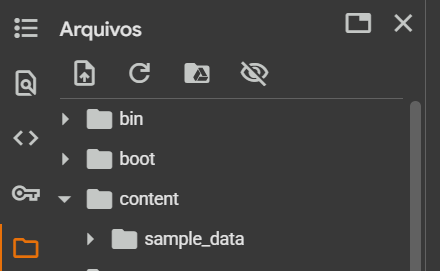


In [1]:
### IMPORTANDO ARQUIVOS QUE SERÃO USADOS NO TESTE ###

!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json -O products.json
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv -O sales.csv
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/users.csv -O users.csv

path_products = "/content/products.json"
path_sales = "/content/sales.csv"
path_users = "/content/users.csv"

--2025-09-08 22:15:45--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3186 (3.1K) [text/plain]
Saving to: ‘products.json’

products.json       100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-09-08 22:15:46 (33.5 MB/s) - ‘products.json’ saved [3186/3186]

--2025-09-08 22:15:46--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24411 (24K) [text/plain]


In [2]:
### IMPORTANDO BIBLIOTECAS NECESSÁRIAS ###

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [3]:
### INSTANCIANDO SPARK ###

spark = SparkSession.builder.appName('test-spark').getOrCreate()

---

# Seu teste começa aqui 🍀 Boa sorte!

# **Questão 1**

Declare um novo dataframe que mostre o nome do produto e o valor final da compra.

In [4]:
df_product = spark.read.json('/content/products.json')


In [5]:
df_users = spark.read.csv('/content/users.csv',header=True)


In [6]:
df_sales = spark.read.csv('/content/sales.csv',header=True)

In [7]:
#Nossa Coluna de preço, denomida 'price' estava como String, o que não permitiria contas
df_product = df_product.withColumn('price', regexp_replace('price', "[$]", "").cast(DoubleType()))


In [8]:
#Salvando nossos dataframes em views
df_product = df_product.createOrReplaceTempView("df_product")
df_users = df_users.createOrReplaceTempView("df_users")


In [9]:
df_sales = df_sales.createOrReplaceTempView("df_sales")


In [10]:
#Criação de um dataframe que junta o Id da compra, o produto comprado a quantidade e o vaor final da compra
df_productXsale = spark.sql("""
  SELECT sle.sale_id, prd.product, sle.qtde, (prd.price * sle.qtde) as Valor_Final
  FROM df_product prd
  JOIN df_sales sle
    ON prd.product_id = sle.product_id
  ORDER BY Valor_Final DESC

""")

df_productXsale.show()

+-------+----------------+----+-----------+
|sale_id|         product|qtde|Valor_Final|
+-------+----------------+----+-----------+
|    488|    Calça Social|   3|     373.29|
|    657|    Calça Social|   3|     373.29|
|    665|    Calça Social|   3|     373.29|
|    336|    Calça Social|   3|     373.29|
|    567|    Calça Social|   3|     373.29|
|    644|    Calça Social|   3|     373.29|
|    958|    Calça Social|   3|     373.29|
|    353|Jaqueta de Couro|   3|     372.51|
|    483|Jaqueta de Couro|   3|     372.51|
|    149|Jaqueta de Couro|   3|     372.51|
|    570|Jaqueta de Couro|   3|     372.51|
|    622|Jaqueta de Couro|   3|     372.51|
|    224|      Sapatilhas|   3|     369.99|
|    296|      Sapatilhas|   3|     369.99|
|    322|      Sapatilhas|   3|     369.99|
|    533|      Sapatilhas|   3|     369.99|
|    630|      Sapatilhas|   3|     369.99|
|    814|      Sapatilhas|   3|     369.99|
|    831|      Sapatilhas|   3|     369.99|
|    856|      Sapatilhas|   3| 

# QUESTÃO 2
Declare um novo dataframe com o valor total gasto por cliente.

Ao fazer uma consulta, pude observar que a primeira linha era o nome das nossas colunas.. antes de prosseguir, vou resolver.

In [11]:
df_users = spark.read.csv('/content/users.csv', header=True)
df_users.show()

+---------+-------------------+--------------------+------+--------------+----------------+
|client_id|               name|               email|gender|         login|        password|
+---------+-------------------+--------------------+------+--------------+----------------+
|        1|   Mitch Kilpatrick|mkilpatrick0@cdc.gov|     M|  mkilpatrick0|      uE9+F7h5*P|
|        2|          Kit Kyncl|kkyncl1@miitbeian...|     M|       kkyncl1|        nZ1>gR%L|
|        3|    Marylou Presman|mpresman2@twitter...|     F|     mpresman2|        aP2#@KQI|
|        4|   Gilberta Andrieu|gandrieu3@4shared...|     M|     gandrieu3|oN2/1oW(IPSNWwoW|
|        5|Tobiah Boughtflower|tboughtflower4@pa...|     M|tboughtflower4| hD7{HV(oHo'C&P.|
|        6|      Prent Clifton|  pclifton5@cnbc.com|     F|     pclifton5|      fF4$?1cViZ|
|        7|   Katinka Mosedill|  kmosedill6@loc.gov|     F|    kmosedill6|  yC9=dRM)1_ZuKp|
|        8|       Aime Cheyney|  acheyney7@gmpg.org|     F|     acheyney7|  dQ1&

In [12]:
#Consulta para saber o faturamento total por cliente
faturamentoXcliente = spark.sql("""
  SELECT u.name, SUM(sle.qtde * prd.price) as Total
  from df_users u
  LEFT JOIN df_sales sle
    on u.client_id = sle.client_id
  LEFT JOIN df_product prd
    on sle.product_id = prd.product_id
  GROUP BY u.name
  ORDER BY u.name ASC
""")

faturamentoXcliente.show()

+--------------------+------------------+
|                name|             Total|
+--------------------+------------------+
|      Adda Dmitrovic|            849.73|
|        Adelina Joel|            110.91|
|           Adi Ovise|              NULL|
|        Aime Cheyney|            337.74|
|         Alec Pigdon|           1554.22|
|    Alexandra Corbie|            504.77|
|       Alfie Pattlel|            1755.6|
|     Allison Bardill|             645.3|
|        Allyson Calf| 489.8299999999999|
|            Alma Ida|           1166.06|
|        Alvina Jelly|           1083.14|
|     Alvinia Drakers|463.56000000000006|
|     Anestassia Saby|            617.36|
|     Annabal Widocks|            248.34|
|Antoinette Rigles...| 785.7900000000001|
|  Archie January 1st|            201.18|
|      Arvy Scutching|           1517.77|
|       Barnaby Clemo|            505.69|
|     Basia Berisford|           1085.81|
|    Basil Catcheside|1047.8600000000001|
+--------------------+------------

#QUESTÃO 3

Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.

Para continuar, preciso da definiçaõ do que são os melhores clientes... Para isso, vou pensar que são os clientes que mais gastaram.

In [13]:
df_melhoresClientes = spark.sql("""
  SELECT u.name, u.email, SUM(sle.qtde * prd.price) as total_gasto
  FROM df_users u
  JOIN df_sales sle
    ON u.client_id = sle.client_id
  JOIN df_product prd
    ON sle.product_id = prd.product_id
  GROUP BY u.name, u.email
  ORDER BY total_gasto DESC

""")


df_melhoresClientes.limit(5).show()


+-----------------+--------------------+------------------+
|             name|               email|       total_gasto|
+-----------------+--------------------+------------------+
|Randa Friedenbach|rfriedenbach3m@pa...|           2240.51|
|  Giuditta Blease|gblease6s@friendf...|           1902.85|
|     Cher Higford| chigfordn@issuu.com|           1843.35|
|    Keen Juggings|kjuggings5j@phoca.cz|1795.8600000000001|
|    Alfie Pattlel|apattlelu@discuz.net|            1755.6|
+-----------------+--------------------+------------------+



#QUESTÃO 4
Declare um novo dataframe com os cinco produtos mais vendidos nos últimos seis meses (considerando período de dados disponível nos arquivos) contendo o nome do produto e a quantidade de produtos vendidos nesse período.

Vamos pegar a última data que houve compra e a primeira

In [14]:
df_dataMax = spark.sql("""
  SELECT MAX(date) as Ultima_Venda
    FROM df_sales

""")

df_dataMax.show()

df_dataMax = df_dataMax.createOrReplaceTempView("df_dataMax")

+------------+
|Ultima_Venda|
+------------+
|  31/10/2022|
+------------+



In [15]:
df_dataMin = spark.sql("""
  SELECT MIN(date) as Primeira_Venda
    FROM df_sales


""")

df_dataMin.show()

df_dataMin = df_dataMin.createOrReplaceTempView("df_dataMin")

+--------------+
|Primeira_Venda|
+--------------+
|    01/01/2022|
+--------------+



In [16]:
#Consulta para saber o 5 produtos mais vendidos no período de 6 meses
df_6meses = spark.sql("""
  SELECT prd.product, SUM(sle.qtde) as quant
  FROM df_product prd
  JOIN df_sales sle
    ON prd.product_id = sle.product_id
  CROSS JOIN df_dataMax max
  WHERE sle.date BETWEEN ADD_MONTHS(max.Ultima_Venda, -6) AND max.Ultima_Venda
  GROUP BY prd.product
  ORDER BY quant DESC

""")


df_6meses.show(5)


+-------+-----+
|product|quant|
+-------+-----+
+-------+-----+



A função  ADD_MONTHS(max.Ultima_Venda, -6) que utilizei anteriormente para pegar a data máxima -6 meses não funcionou como eu queria... imaginei que deveria ter vendas sim, então fiz de uma maneira um pouco manual.

Peguei a última data de compra e diminui 6 meses a partir dela, incluido o valor manualmente na query

In [17]:
df_6meses = spark.sql("""
  SELECT prd.product, SUM(sle.qtde) as quant
  FROM df_product prd
  JOIN df_sales sle
    ON prd.product_id = sle.product_id
  CROSS JOIN df_dataMax max
  WHERE sle.date BETWEEN  '2022-07-01' AND max.Ultima_Venda
  GROUP BY prd.product
  ORDER BY quant DESC

""")


df_6meses.show(5)

+--------------------+-----+
|             product|quant|
+--------------------+-----+
|  Calça Cintura Alta| 24.0|
|Blusa de Manga Longa| 23.0|
|          Macaquinho| 22.0|
|       Saia Plissada| 20.0|
|        Vestido Midi| 20.0|
+--------------------+-----+
only showing top 5 rows



#QUESTÃO 5
Calcular a média de faturamento por cliente e o desvio padrão.

In [18]:
faturamentoXcliente.createOrReplaceTempView("faturamentoXcliente")
media_df = faturamentoXcliente.agg(avg("Total").alias("media_de_gastos_por_cliente"))
media_df.show()

+---------------------------+
|media_de_gastos_por_cliente|
+---------------------------+
|          707.2573539518899|
+---------------------------+



In [19]:
media_df = media_df.withColumn('media_de_gastos_por_cliente', media_df['media_de_gastos_por_cliente'].cast(DoubleType()))


In [20]:
media_df.printSchema()

root
 |-- media_de_gastos_por_cliente: double (nullable = true)



In [21]:
media_df = media_df.withColumn("media_de_gastos_por_cliente", format_number("media_de_gastos_por_cliente",2))
media_df.show()

+---------------------------+
|media_de_gastos_por_cliente|
+---------------------------+
|                     707.26|
+---------------------------+



In [22]:
Desvio_Padrao = faturamentoXcliente.agg(stddev("Total").alias("Desvio_Padrao"))

Desvio_Padrao.show()

+-----------------+
|    Desvio_Padrao|
+-----------------+
|414.3416116528875|
+-----------------+



In [23]:
Desvio_Padrao= Desvio_Padrao.withColumn('Desvio_Padrao', Desvio_Padrao['Desvio_Padrao'].cast(DoubleType()))


In [24]:
Desvio_Padrao = Desvio_Padrao.withColumn("Desvio_Padrao", format_number("Desvio_Padrao",2))
Desvio_Padrao.show()

+-------------+
|Desvio_Padrao|
+-------------+
|       414.34|
+-------------+



In [25]:
Desvio_Padrao = Desvio_Padrao.createOrReplaceTempView("Desvio_Padrao")
media_df = media_df.createOrReplaceTempView("media_df")


In [26]:
#Hora de juntar

df_juncao = spark.sql("""

  SELECT Desvio_Padrao, media_de_gastos_por_cliente
  FROM Desvio_Padrao
  CROSS JOIN media_df
""")

df_juncao.show()

+-------------+---------------------------+
|Desvio_Padrao|media_de_gastos_por_cliente|
+-------------+---------------------------+
|       414.34|                     707.26|
+-------------+---------------------------+



In [27]:
df_juncao = df_juncao.createOrReplaceTempView("df_juncao")


#QUESTÃO 6
Classificar os clientes em três categorias: silver, gold, platinum

platinum: clientes que gastaram mais que a média de faturamento por cliente;

gold: clientes que gastaram do menor desvio padrão até a média de faturamento por cliente;

silver: clientes que gastaram no máximo a média menos o desvio padrão do faturamento por cliente;

In [28]:
df_classificacao = spark.sql("""
  SELECT fc.name, fc.Total,
    CASE
      WHEN
        fc.Total > jun.media_de_gastos_por_cliente
        THEN 'Platinum'
      WHEN
        fc.Total BETWEEN jun.Desvio_Padrao AND jun.media_de_gastos_por_cliente
        THEN 'Gold'
    ELSE
      'Silver'
    END AS Classificacao
  FROM faturamentoXcliente AS fc
  CROSS JOIN df_juncao jun

""")

df_classificacao.show()

+-------------------+------------------+-------------+
|               name|             Total|Classificacao|
+-------------------+------------------+-------------+
|     Melita Drewson|            532.26|         Gold|
|       Karel Laight|           1130.54|     Platinum|
|  Shandeigh Ferries|            444.76|         Gold|
|Tobiah Boughtflower|            224.22|       Silver|
|      Enid Couthard| 466.5400000000001|         Gold|
|       Cary Syddall|           1107.99|     Platinum|
|      Ferrel Orriss|            785.26|     Platinum|
|     Christye Ryton|           1124.79|     Platinum|
|    Giuditta Blease|1902.8500000000001|     Platinum|
|  Skipton Coldicott|             82.64|       Silver|
|     Tedman Gerssam|           1043.94|     Platinum|
|      Pepito Mocher|            108.96|       Silver|
|          Kym Beade|            110.27|       Silver|
|       Liva Boswood|            310.32|       Silver|
|        Ethyl Yoxen|           1501.65|     Platinum|
|      Mor

In [29]:
df_classificacao = df_classificacao.createOrReplaceTempView("df_classificacao")

#Questão 7
Salvar um arquivo parquet com os três produtos mais consumidos de cada categoria do cliente.

In [30]:
#Vamos pegar os dados que mais vamos precisar e colocar todos eles juntos na mesma tabela
df_vendasEcategorias = spark.sql("""
  SELECT prd.product, sle.qtde, cla.Classificacao
  FROM df_product as prd
  JOIN df_sales as sle
     ON sle.product_id = prd.product_id
  CROSS JOIN df_classificacao as cla
  GROUP BY prd.product, sle.qtde, cla.Classificacao
""")

df_vendasEcategorias.show()

+------------------+----+-------------+
|           product|qtde|Classificacao|
+------------------+----+-------------+
|Blusa de Gola Alta|   3|         Gold|
|  Vestido de Festa|   2|         Gold|
|    Sapatos Oxford|   3|     Platinum|
|           Cardigã|   1|         Gold|
|     Blusa Cropped|   3|       Silver|
|     Camiseta Polo|   2|     Platinum|
|    Blusa de Renda|   3|     Platinum|
|      Vestido Midi|   2|         Gold|
|    Bolsa de Couro|   2|       Silver|
|   Tênis Esportivo|   1|       Silver|
|       Camisa Polo|   2|     Platinum|
|       Calça Chino|   2|         Gold|
|        Bolsa Tote|   2|       Silver|
|       Calça Cargo|   1|       Silver|
|       Calça Cargo|   3|     Platinum|
|           Macacão|   2|     Platinum|
|       Calça Jeans|   1|         Gold|
|Camiseta Estampada|   3|         Gold|
|     Chapéu Fedora|   1|       Silver|
|       Calça Cargo|   3|         Gold|
+------------------+----+-------------+
only showing top 20 rows



In [31]:
df_vendasEcategorias = spark.sql("""
  SELECT prd.product, SUM(sle.qtde) as Total_Vendido, cla.Classificacao
  FROM df_product as prd
  JOIN df_sales as sle
     ON sle.product_id = prd.product_id
  CROSS JOIN df_classificacao as cla
  GROUP BY prd.product, sle.qtde, cla.Classificacao
""")

df_vendasEcategorias.show()

+------------------+-------------+-------------+
|           product|Total_Vendido|Classificacao|
+------------------+-------------+-------------+
|Blusa de Gola Alta|       2442.0|         Gold|
|  Vestido de Festa|       1184.0|         Gold|
|    Sapatos Oxford|       2394.0|     Platinum|
|           Cardigã|        592.0|         Gold|
|     Blusa Cropped|       1953.0|       Silver|
|     Camiseta Polo|       1862.0|     Platinum|
|    Blusa de Renda|       2394.0|     Platinum|
|      Vestido Midi|       1184.0|         Gold|
|    Bolsa de Couro|       1488.0|       Silver|
|   Tênis Esportivo|       1023.0|       Silver|
|       Camisa Polo|        798.0|     Platinum|
|       Calça Chino|        444.0|         Gold|
|        Bolsa Tote|        930.0|       Silver|
|       Calça Cargo|        186.0|       Silver|
|       Calça Cargo|       3192.0|     Platinum|
|           Macacão|       2394.0|     Platinum|
|       Calça Jeans|        740.0|         Gold|
|Camiseta Estampada|

In [32]:
df_vendasEcategorias = df_vendasEcategorias.createOrReplaceTempView("df_vendasEcategorias")

#Explicação de alguns detalhes
Na próxima célula, usei-a para arrumar como gostaria de visualizar o que foi pedido na última questão.

Para isso criei uma abela temporária com os campos que eu queria fazer o select e fiz uma breve conta sando o:

`ROW_NUMBER() OVER (PARTITION BY Classificacao ORDER BY total_vendido DESC) AS ranking`

Aqui o objetivo era separar o select por classificação e ordenar pela quantidade total vendida, do maior para o menor. O ROW_NUMBER() faz a listagem do primeiro, segundo e terceiro. No final de tudo, chamamos essa nova coluna de ranking. Toda vez que muda de Classificação, ele faz isso novamente, até terminar.

A tabela que eu criei para ajudar nas consultas dessa nova foi a df_vendasEcategorias, onde a apelidei de 'vc(vendasEcategorias)


In [33]:
df_parquetRanking = spark.sql("""

WITH TabelaComRanking AS (

  SELECT vc.product, vc.Total_Vendido , vc.Classificacao,
  ROW_NUMBER() OVER (PARTITION BY Classificacao ORDER BY Total_vendido DESC) AS ranking

  FROM df_vendasEcategorias vc

)
SELECT *
FROM TabelaComRanking
WHERE ranking <= 3
ORDER BY Classificacao, ranking

""")
df_parquetRanking.show()

+--------------------+-------------+-------------+-------+
|             product|Total_Vendido|Classificacao|ranking|
+--------------------+-------------+-------------+-------+
|Blusa de Manga Longa|       3108.0|         Gold|      1|
|     Mochila de Lona|       2886.0|         Gold|      2|
|  Blusa de Gola Alta|       2442.0|         Gold|      3|
|Blusa de Manga Longa|       5586.0|     Platinum|      1|
|     Mochila de Lona|       5187.0|     Platinum|      2|
|      Blusa de Malha|       4389.0|     Platinum|      3|
|Blusa de Manga Longa|       3906.0|       Silver|      1|
|     Mochila de Lona|       3627.0|       Silver|      2|
|      Blusa de Malha|       3069.0|       Silver|      3|
+--------------------+-------------+-------------+-------+



In [34]:
df_parquetRanking.write.partitionBy("Classificacao").mode("Overwrite").parquet("df_parquetRanking")